#### This module will will be used to develop an interactive dashboard in which users can interact with the dashboard at least in one way. When the user interacts with the dashboard a visible change will occur on the dashboard.  

## Libraries

In [1]:
#!pip install plotly
#!pip install dash

In [2]:
#!pip install jupyter-dash

In [37]:
#to work with dataframe
import pandas as pd
#to perform mathematical and statistical calculations
import numpy as np
import dash
#for interactive graphs/visualization
#plotly express
import plotly.express as px
#plotly graphical object
import plotly.graph_objects as go
#to work with dashboards
from jupyter_dash import JupyterDash
#import dash core components
from dash import dcc
from dash.dependencies import Input,Output
#to create html objects
from dash import html

In [4]:
#for database
#!python -m pip install "pymongo[srv]"
from pymongo import MongoClient
import json

In [5]:
#for other python modules to main module/file
import import_ipynb

In [6]:
#import storage module to main module
import DEF_MFS_MVP_Storage as storage_module

importing Jupyter notebook from DEF_MFS_MVP_Storage.ipynb


In [7]:
#define class object for mongoDB storage module class
mongoDB=storage_module.MongoDbAtlas()

In [8]:
#connect to mongodb database 
#retrive username, password and host_address from JSON
username,password,host_address=mongoDB.fetch_creds("DEF-MFS-MVP-Configuration.JSON")
#use the retrived credentials to connect to mongoDB database
mongoDB.connect_database(username,password,host_address)
#connect to tesla database and collection
Tesla_collection=mongoDB.create_database("DEF-MFS-MVP-Stocks","DEF-MFS-MVP-Tesla")

In [9]:
dic_from_db_tesla,df_from_db_tesla=mongoDB.fetch_dbdata(Tesla_collection)

In [10]:
df_from_db_tesla

,_id,Date,Open,High,Low,Close,Volume
0,63f68ef66d7d6e5cb7e3b996,2021-01-04,239.820007,248.163330,239.063339,243.256668,145914600
1,63f68ef66d7d6e5cb7e3b997,2021-01-05,241.220001,246.946671,239.733337,245.036667,96735600
2,63f68ef66d7d6e5cb7e3b998,2021-01-06,252.830002,258.000000,249.699997,251.993332,134100000
3,63f68ef66d7d6e5cb7e3b999,2021-01-07,259.209991,272.329987,258.399994,272.013336,154496700
4,63f68ef66d7d6e5cb7e3b99a,2021-01-08,285.333344,294.829987,279.463318,293.339996,225166500
...,...,...,...,...,...,...,...
498,63f68ef66d7d6e5cb7e3bb88,2022-12-23,126.370003,128.619995,121.019997,123.150002,166989700
499,63f68ef66d7d6e5cb7e3bb89,2022-12-27,117.500000,119.669998,108.760002,109.099998,208643400
500,63f68ef66d7d6e5cb7e3bb8a,2022-12-28,110.349998,116.269997,108.239998,112.709999,221070500
501,63f68ef66d7d6e5cb7e3bb8b,2022-12-29,120.389999,123.570000,117.500000,121.820000,221923300


### Class to display interactive plots with plotly

#### This class is defined to plot interactive graphs that can best describe our stock market prices over time

In [42]:
class InteractivePlotly():
    
    #class constructor
    def __init__(self,dataframe):
        self.df=dataframe
        #self.feat_columns=target_features
        
    #Line Plot
    #our data is a time series data where stock market changes according to time
    #line plots are best used to describe a time series data
    #this instance method will plot line plots for all target_features selected ie Open, Close, High and Low
    def interactive_line_all(self):
        fig = px.line(self.df,x = "Date", y = ["Open","High","Low","Close"],
                      title='A Plotly Express for Time Series Plot of Different Stock Market Prices')
        fig.update_layout(xaxis_title=" Date",yaxis_title="Stock Market Prices")
        #A range slider is a small subplot-like area below a plot which allows users to pan and zoom the X-axis 
        #while maintaining an overview of the chart.
        fig.update_xaxes(rangeslider_visible=True)
        fig.show()
        #save plotly graph as html file
        fig.write_html("interactive_line_all.html")
    
    
    #subplots using facetplots to dislay graph of individual values
    def interactive_line_indv(self):
        #With the.melt() function, we may pivot a DataFrame from wide to long format. 
        #It manipulates a DataFrame into a structure where one or more columns—Date Column—are identifier variables
        #while all other columns—Open, Close, High, and Low—which are thought of as measured variables—are unpivoted 
        #to the row axis, leaving just two non-identifier columns, variable and value.
        dfm = self.df[["Date","Open","Close","High","Low"]].melt('Date', var_name='Feature_Target', value_name='Values')
        #use line plot and facet_col to make subplots
        fig = px.line(dfm,x = "Date", y = "Values",
                      facet_col = "Feature_Target",facet_col_wrap=1,
                      title='A Plotly Express for Time Series Plot of Different Stock Market Prices')
        #A range slider is a small subplot-like area below a plot which allows users to pan and zoom the X-axis 
        #while maintaining an overview of the chart.
        #fig.update_xaxes(rangeslider_visible=True)
        fig.show()
        #save plotly graph as html file
        fig.write_html("interactive_line_indv.html")
        
    #Candlestick plot
    #we will use candlestick chart to describe open, high, low and close for a given dates. 
    #The boxes represent the spread between the open and close values and the lines represent the spread between the low and high values. 
    #Sample points where the close value is higher (lower) then the open value are called increasing (decreasing).
    #By default, increasing candles are drawn in green whereas decreasing are drawn in red.
    def interactive_candlestick(self):
        fig = go.Figure(data=[go.Candlestick(x=self.df['Date'],
                                             open=self.df['Open'],
                                             high=self.df['High'],
                                             low=self.df['Low'],
                                             close=self.df['Close'])])
        fig.update_layout(xaxis_title=" Date",yaxis_title="Stock Market Prices",title="A Plotly go Candlestick Plot to describe Open, Close, High and Low Stock Market Values for Different Dates")

        fig.show()
        #save plotly graph as html file
        fig.write_html("interactive_candlestick.html")
    
    #OHLC plot
    #The OHLC chart (for open, high, low and close) describes open, high, low and close values for a given x coordinate-Date.
    #The tip of the lines represent the low and high values and the horizontal segments represent the open and close values. 
    #Sample points where the close value is higher (lower) then the open value are called increasing (decreasing). 
    #By default, increasing items are drawn in green whereas decreasing are drawn in red.
    def interactive_OHLC(self):
        fig = go.Figure(data=[go.Ohlc(x=self.df['Date'],
                                             open=self.df['Open'],
                                             high=self.df['High'],
                                             low=self.df['Low'],
                                             close=self.df['Close'])])
        fig.update_layout(title="A Plotly go OHLC Plot to describe Open, Close, High and Low Stock Market Values for Different Dates")

        fig.show()
        #save plotly graph as html file
        fig.write_html("interactive_OHLC.html")
    
    
    

In [16]:
IP=InteractivePlotly(df_from_db_tesla)

In [17]:
IP.interactive_line_all()

In [18]:
IP.interactive_line_indv()

In [19]:
IP.interactive_OHLC()

In [20]:
IP.interactive_candlestick()

### Class to Visualize Graphs in Dash Dashboard

We will be using the instance function wide_to_long() from the "wideformat_to_longformat" Class, so we will be inheriting from this class.

#### This class will be used create interactive analytic web applications with dropdown menus  and option buttons in Dash dashboard.

In [41]:
class Dash_Dashboard():
    #we want ti inherit the wide_to_long() function from the wideformat_to_longformat class
    
    #class constructor
    def __init__(self,dataframe):
        self.df=dataframe
        #self.feat_columns=target_features
        
        
    #this instance method is used to create simple lineplots on dash dashboard
    def Dash_lineplot(self):
        #constructor for creating the dash application
        app = JupyterDash(__name__)
        #set app title
        app.title="Stock market Values according to Time"
        fig = px.line(self.df, x='Date', y=["Open","High","Low","Close"])
        fig.update_layout(template="plotly_dark")
        #layout of the dash app describes what the app looks like
        #layout is hierarchial tree of components
        # The dash HTML library provides classes for all of the HTML tags and the keyword arguments describe the HTML attributes
        #like style, class name, and ID.
        #html.Div-our main container
        app.layout=html.Div(
        id="app-container",
        children=[
            #html header
            html.H1("Stock market Values according to Time",style={'text-align':'center'}),
            #P object for paragraph-"Select Values" which gets rendered by dash as html element
            html.P("Unit is in USD"),
            # dcc allows us to create interactive components like graphs, dropdown menus, or date ranges
            dcc.Graph(figure=fig)
        ])
        
        app.run_server(debug=True)    
    
        
        
        
    #this class instance function will let us choose and plot line graphs for different stock values- Open, High, Low and Close
    #using dropdowns
    def Dash_dropdown_OHLC(self):
        
        #constructor for creating the dash application
        app = JupyterDash(__name__)
        #set app title
        app.title="Stock market Values according to Time"
        #layout of the dash app describes what the app looks like
        #layout is hierarchial tree of components
        # The dash HTML library provides classes for all of the HTML tags and the keyword arguments describe the HTML attributes
        #like style, class name, and ID.
        #html.Div-our main container
        app.layout = html.Div([
            #html header
            #1
            html.H4('Open High Low and Close Stock Market Values in Dash',style={'text-align':'center'}),
            # dcc allows us to create interactive components like graphs, dropdown menus, or date ranges
            #2
            dcc.Graph(id="time-series-chart"),
            #P object for paragraph-"Select Values" which gets rendered by dash as html element
            #3
            html.P("Select Values:"),
            #to enable dropdown menu
            #4
            dcc.Dropdown(
                id="Stock_value",
                options=["Open", "High", "Low","Close"],
                value="Open",
                clearable=False,
            ),
        ])
        #to allow interactivity in dash, we use callback
        #connects dash components with graphs
        #callback function are automatically called by Dash whenever an input component's property changes in order to update 
        #output component.
        @app.callback(
            #output element
        Output("time-series-chart", "figure"), 
            #input element
            #Whenever an input property changes, the callback function will get called automatically. 
            #Dash passes  the new value of the input to the callback function and updates the property of the output component
            #with whatever gets returned by the function. 
        Input("Stock_value", "value"))
        def display_time_series(Stock_value):
            fig = px.line(self.df, x='Date', y=Stock_value)
            fig.update_layout(
            template="plotly_dark")
            return fig

        #to run dash server
        #debug=True for debugging features
        app.run_server(debug=True)
    
    #this instance class will let us pick stock market values to be displayed on our figures using Dash's Checklist
    def DASH_checklist_OHLC(self):
        
        #constructor for creating the dash application
        app = JupyterDash(__name__)
        #set app title
        app.title="Stock market Values according to Time"
        #layout of the dash app describes what the app looks like
        #layout is hierarchial tree of components
        # The dash HTML library provides classes for all of the HTML tags and the keyword arguments describe the HTML attributes
        #like style, class name, and ID.
        #html.Div-our main container
        app.layout = html.Div([
            #html header
            #1
            html.H4('Open High Low and Close Stock Market Values in Dash',style={'text-align':'center'}),
            # dcc allows us to create interactive components like graphs, dropdown menus, or date ranges
            #2
            dcc.Graph(id="time-series-chart"),
            #P object for paragraph-"Select Values" which gets rendered by dash as html element
            #3
            html.P("Select Values:"),
            #to enable checklist
            #4
            dcc.Checklist(
                #we define a list of options to choose from
                options=[
                    {"label": "Open", "value": "Open"},
                    {"label": "High", "value": "High"},
                    {"label": "Low", "value": "Low"},
                    {"label": "Close", "value": "Close"},
                ],
                value=["Open"],
                id="checklist",
            ),
        ])
        @app.callback(
        Output("time-series-chart", "figure"),
        Input("checklist", "value"),
        )
        def update(checklist):
                fig = px.line(self.df,x="Date",y=checklist)
                return fig
        app.run_server(debug=True)
        
        
    #this function is used to plot interactive candlestick plot where you will have the option to use a range slider    
    def DASH_candlestick(self):
        
        app = JupyterDash(__name__)
        
        app.layout = html.Div([
            html.H4('Candlestick chart',style={'text-align':'center'}),
            dcc.Checklist(
                id='toggle-rangeslider',
                options=[{'label': 'Include Rangeslider', 
                          'value': 'slider'}],
                value=['slider']
            ),
            dcc.Graph(id="graph"),
        ])
        
        @app.callback(
            Output("graph", "figure"), 
            Input("toggle-rangeslider", "value"))
        def display_candlestick(value):
            fig = go.Figure(go.Candlestick(
                x=self.df['Date'],
                open=self.df['Open'],
                high=self.df['High'],
                low=self.df['Low'],
                close=self.df['Close']
            ))

            fig.update_layout(
                xaxis_rangeslider_visible='slider' in value
            )

            return fig


        app.run_server(debug=True)

In [39]:
DASH=Dash_Dashboard(df_from_db_tesla)

In [40]:
DASH.Dash_lineplot()

SystemExit: 1

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3351: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



In [31]:
DASH.Dash_dropdown_OHLC()

Dash app running on http://127.0.0.1:8050/


In [32]:
DASH.DASH_checklist_OHLC()

Dash app running on http://127.0.0.1:8050/


In [33]:
DASH.DASH_candlestick()

Dash app running on http://127.0.0.1:8050/


In [17]:
abc=Dash_Dashboard(df_from_db_tesla)


In [18]:
abc.Dash_dropdown_OHLC()

Dash app running on http://127.0.0.1:8050/


In [19]:
abc.DASH_checklist_OHLC()


Dash app running on http://127.0.0.1:8050/


In [20]:
abc.Dash_lineplot()

Dash app running on http://127.0.0.1:8050/


In [16]:
abc.DASH_candlestick()

Dash app running on http://127.0.0.1:8050/


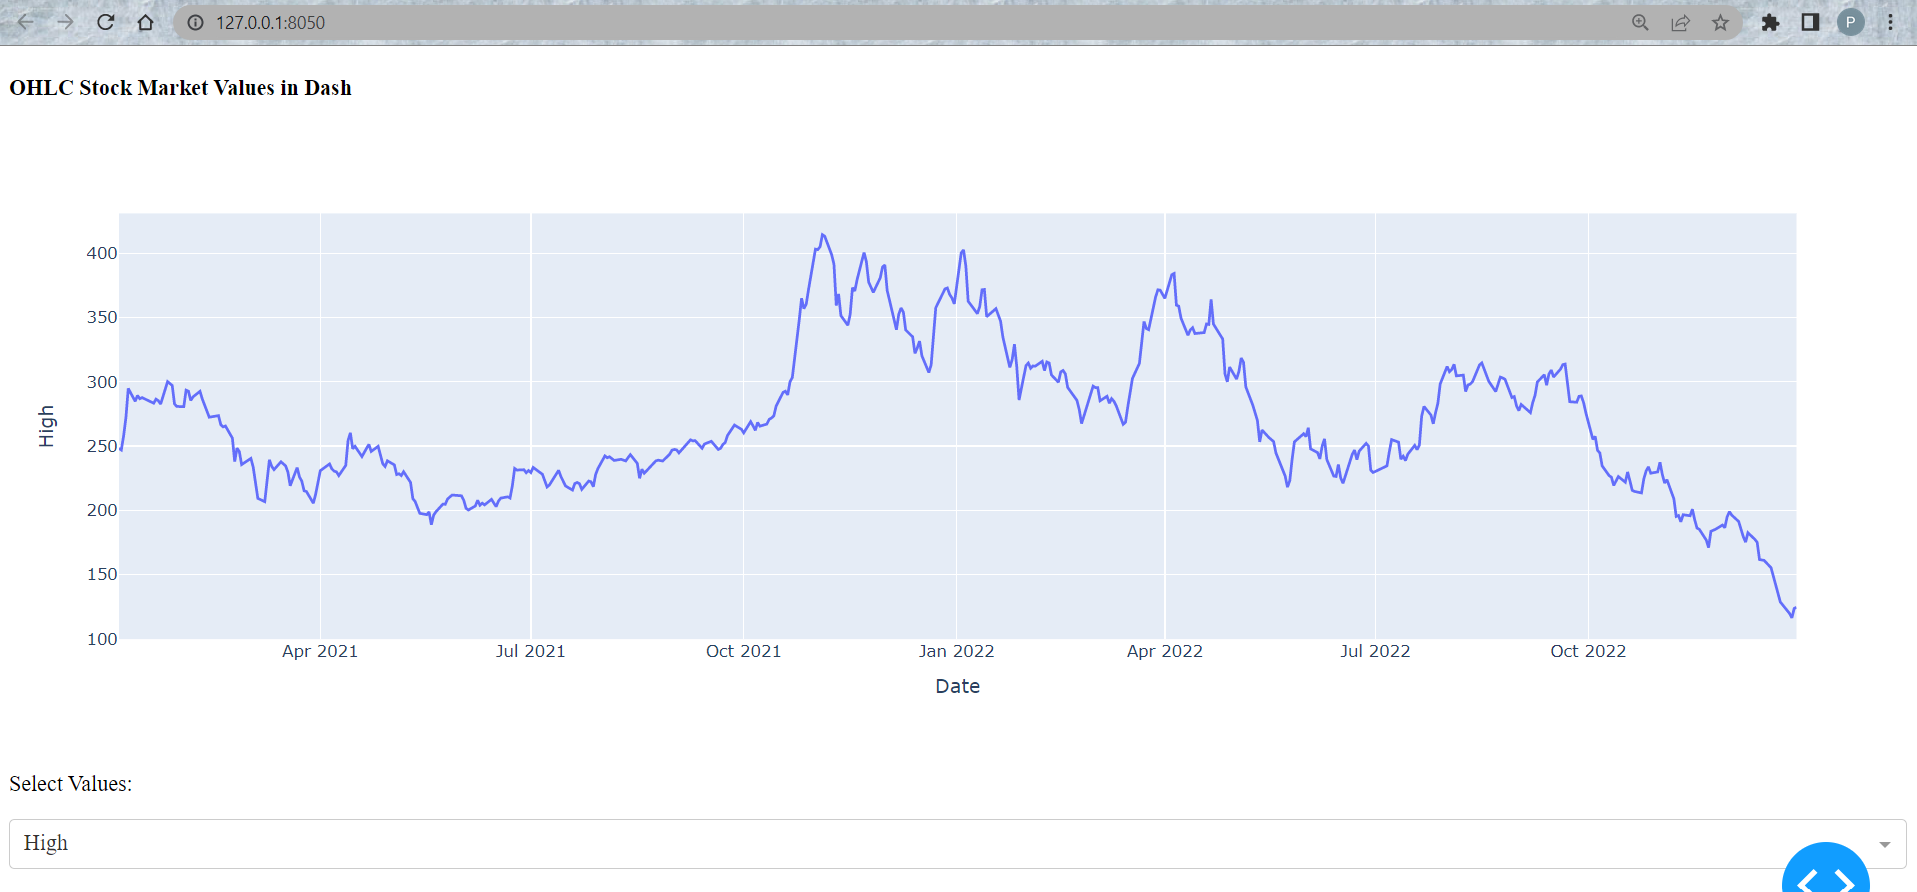

In [1]:
class Interactive_StockPrices:
    #
    def __init__(self,df_tesla,df_ford):
        self.df_tesla=df_tesla
        self.df_ford=df_ford

app = JupyterDash(__name__)

app.layout =html.Div([
    #html header
    html.H1('Open High Low and Close Stock Market Values in Dash',style={'text-align':'center'}),
    html.P("Select Ticker:"),
    dcc.Dropdown(
        id = 'graph-type',
        placeholder='Select Stock',
        options= [
            {'label' : 'Tesla', 'value' : 'Tesla'},
            {'label' : 'Ford', 'value' : 'Ford'}
        ],
        value="Tesla"
    ),
    dcc.Graph(
        id='graph'
    ),
    dcc.Checklist(
                id='toggle-rangeslider',
                options=[{'label': 'Include Rangeslider', 
                          'value': 'slider'}],
                value=['slider']
            ),
    #P object for paragraph-"Select Values" which gets rendered by dash as html element
    html.P("Select Values:"),
    dcc.Checklist(
        #we define a list of options to choose from
        options=[
            {"label": "Open", "value": "Open"},
            {"label": "High", "value": "High"},
            {"label": "Low", "value": "Low"},
            {"label": "Close", "value": "Close"},
        ],
        value=["Open"],
        id="checklist",
    ),
])

@app.callback(
    Output('graph', 'figure'),
    [Input('graph-type', 'value'),Input('checklist', 'value'),Input('toggle-rangeslider', 'value')]
)
def choose_graph_type(graph_type,checklist,rangeslider):
    if graph_type is None:
        raise dash.exceptions.PreventUpdate()
    if graph_type == 'Tesla':
        fig=px.line(df_from_db_tesla, x='Date', y=checklist)
        fig.update_layout(template="presentation",xaxis_rangeslider_visible='slider' in rangeslider)
        
        return fig
    elif graph_type == 'Ford':
        fig=px.line(df_from_db_ford, x='Date', y=checklist)
        fig.update_layout(template="presentation",xaxis_rangeslider_visible='slider' in rangeslider)
        return fig
    return None


app.run_server(debug=True)

NameError: name 'JupyterDash' is not defined